# 

In [1]:
# https://platform.olimpiada-ai.ro/problems/77

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv("/kaggle/input/equipment-conditions/train.csv")
test = pd.read_csv("/kaggle/input/equipment-conditions/test.csv")

train.shape, test.shape

((400, 5), (100, 5))

In [3]:
train.head()

,SampleID,Feature1,Feature2,Feature3,Feature4
0,50,1.286770,5.397545,-8.497000,10.007335
1,99,6.849422,-4.604580,-7.379322,-6.270230
2,422,-1.989851,10.547025,4.531119,2.374881
3,413,-5.678413,-7.288185,-10.876452,6.315437
4,186,4.341630,4.554769,-9.396261,9.089081


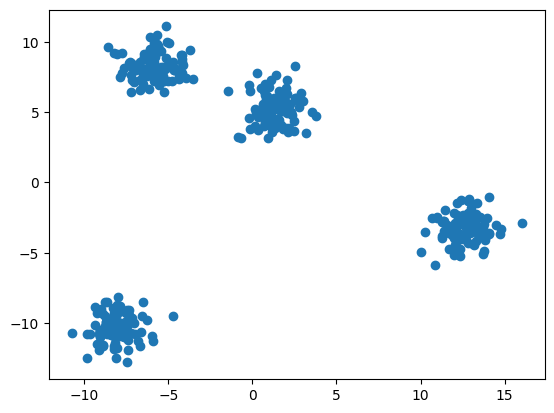

In [4]:
from sklearn.decomposition import PCA

X = train[[f'Feature{i}' for i in range(1, 5)]].values
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

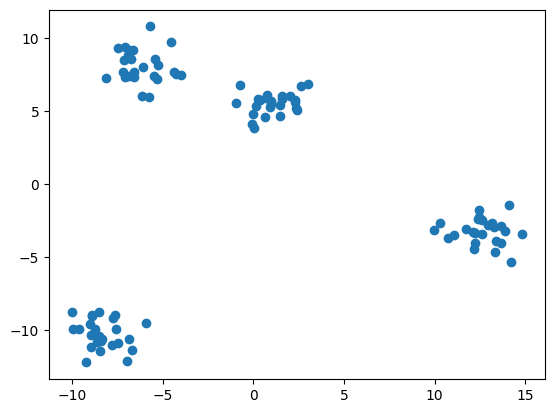

In [5]:
X_test = test[[f'Feature{i}' for i in range(1, 5)]].values

X_test_pca = pca.transform(X_test)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1])
plt.show()

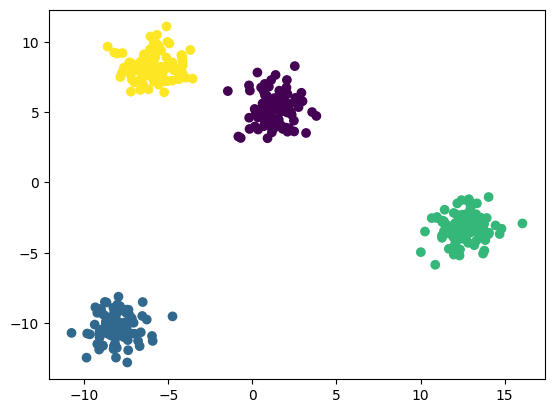

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init='auto')

kmeans.fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()

In [7]:
y_pred = kmeans.predict(X_test_pca)

subm = pd.DataFrame({
    'SampleID': test['SampleID'],
    'Label': y_pred
})

subm.to_csv("submission.csv", index=False)
subm.head()

,SampleID,Label
0,66,1
1,217,3
2,364,3
3,41,0
4,296,0
